<a href="https://colab.research.google.com/github/trikitlekkaeo/Machine-Learning/blob/main/Linear_Regression_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics #สำหรับวัดประสิทธิภาพโมเดล

In [4]:
dataset=pd.read_csv("https://raw.githubusercontent.com/kongruksiamza/MachineLearning/master/Linear%20Regression/Weather.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
print(dataset.shape)

(119040, 31)


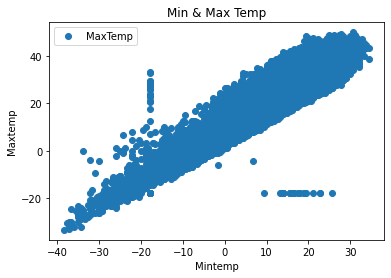

In [9]:
dataset.plot(x='MinTemp',y='MaxTemp',style="o") #style คือตัว o = จุด , x กับ y ต้องจำชื่อ Column
plt.title('Min & Max Temp')
plt.xlabel("Mintemp")
plt.ylabel("Maxtemp")
plt.show()

In [10]:
print(dataset.describe())

                 STA  WindGustSpd        MaxTemp        MinTemp  \
count  119040.000000   532.000000  119040.000000  119040.000000   
mean    29659.435795    37.774534      27.045111      17.789511   
std     20953.209402    10.297808       8.717817       8.334572   
min     10001.000000    18.520000     -33.333333     -38.333333   
25%     11801.000000    29.632000      25.555556      15.000000   
50%     22508.000000    37.040000      29.444444      21.111111   
75%     33501.000000    43.059000      31.666667      23.333333   
max     82506.000000    75.932000      50.000000      34.444444   

            MeanTemp             YR             MO             DA          DR  \
count  119040.000000  119040.000000  119040.000000  119040.000000  533.000000   
mean       22.411631      43.805284       6.726016      15.797530   26.998124   
std         8.297982       1.136718       3.425561       8.794541   15.221732   
min       -35.555556      40.000000       1.000000       1.000000    2.0

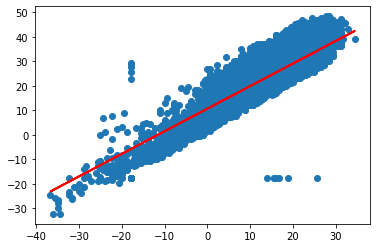

In [14]:
#Train & Test set
x= dataset['MinTemp'].values.reshape(-1,1) #ทำAray 2 มิติ
y= dataset['MaxTemp'].values.reshape(-1,1)

#train 80% test 20%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


#training
model=LinearRegression()
model.fit(x_train,y_train)

#Test Model
y_pred = model.predict(x_test)

plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color="red",linewidth=2)
plt.show()

In [21]:
#Compare true data vs predict data
#y_pred คือผลการทำนายผลลัพธ์จากโมเดล
#y_test คือ ข้อมูลจริงที่ใช้ทดสอบการทำนายผลโมเดล
df = pd.DataFrame({'Actually':y_test.flatten(),'Predicted':y_pred.flatten()}) #แปลงข้อมูลเป็น 1 มิติ

print(df.head())
print(df.shape)

    Actually  Predicted
0  28.888889  33.670351
1  31.111111  30.091251
2  27.222222  26.512151
3  28.888889  31.113851
4  23.333333  15.774852
(23808, 2)


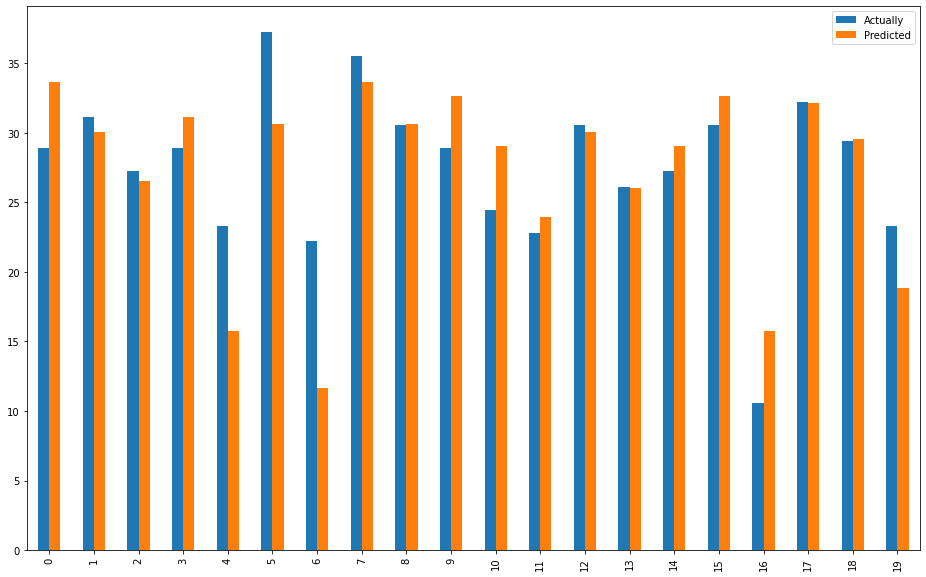

In [19]:
df1 = df.head(20)
df1.plot(kind="bar",figsize=(16,10))
plt.show()

In [29]:
#วัดผล
#ถ้าค่าเข้าใกล้ 0 จะ error น้อย
#MAE y_pred ต่างกับ y_test เท่าไหร่
#MSE y_pred ต่างจาก y_test เท่าไหร่


print("MAE = ",metrics.mean_absolute_error(y_test,y_pred))
print("MSE = ",metrics.mean_squared_error(y_test,y_pred))
print("RMAE = ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Score = ",metrics.r2_score(y_test,y_pred)) #ค่าความแม่นยำ

MAE =  3.19932917837853
MSE =  17.631568097568447
RMAE =  4.198996082109204
Score =  0.7670218843587764
